# Imporiting libraries

In [586]:
import numpy as np
import pandas as pd
import chardet
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, spearmanr, chi2_contingency
from sklearn.metrics import confusion_matrix
import re
import seaborn as sns

from google.colab.data_table import DataTable
DataTable.max_columns = 30

# Reading dataframe

In [587]:
df=pd.read_csv("test.csv")

In [588]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [589]:
df.isna().sum()

model          1
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

# Cleaning price column

In [590]:
df['price'] = df['price'].str.replace('₹', '').str.replace(',', '').astype(np.int32)

In [591]:
df

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [592]:
df['price'].isna().sum()

#price column is fixed

0

# Removing missing value rows from model, camera and os columns

In [593]:
df.dropna(subset=['model', 'camera', 'os'],inplace=True)

In [594]:
df.isna().sum()

model          0
price          0
rating       124
sim            0
processor      0
ram            0
battery        0
display        0
camera         0
card           0
os             0
dtype: int64

# Cleaning rating column

In [595]:
df.isna().sum()

model          0
price          0
rating       124
sim            0
processor      0
ram            0
battery        0
display        0
camera         0
card           0
os             0
dtype: int64

In [596]:
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [597]:
df.isna().sum()

model        0
price        0
rating       0
sim          0
processor    0
ram          0
battery      0
display      0
camera       0
card         0
os           0
dtype: int64

# ram column to 2 new columns Ram and Rom

In [598]:
df['ram'].fillna('0 GB RAM, 0 GB inbuilt', inplace=True)

df['ram'].fillna('0 GB RAM, 0 GB inbuilt', inplace=True)

df[['Ram', 'Rom']] = df['ram'].str.extract('(\d+) GB RAM, (\d+) GB inbuilt')

df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce').astype('Int64')
df['Rom'] = pd.to_numeric(df['Rom'], errors='coerce').astype('Int64')

df.drop('ram', axis=1, inplace=True)

df

,model,price,rating,sim,processor,battery,display,camera,card,os,Ram,Rom
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,12,256
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6,128
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,4,64
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6,128
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,6,128
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio,8,128
1016,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11,6,128
1017,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12,8,256
1018,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12,6,128


# Battery column to 2 new columns

In [599]:
df['battery'].fillna('0 mAh Battery with 0W Fast Charging', inplace=True)

df[['BatteryCapacity', 'FastCharging']] = df['battery'].str.extract('(\d+) mAh Battery with (\d+)W Fast Charging')

df['BatteryCapacity'] = pd.to_numeric(df['BatteryCapacity'], errors='coerce').astype('float')
df['FastCharging'] = pd.to_numeric(df['FastCharging'], errors='coerce').astype('float')

df.drop('battery', axis=1, inplace=True)


df['BatteryCapacity'].fillna(df['BatteryCapacity'].mean(), inplace=True)
df['FastCharging'].fillna(df['FastCharging'].mean(), inplace=True)

df

,model,price,rating,sim,processor,display,camera,card,os,Ram,Rom,BatteryCapacity,FastCharging
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,12,256,5000.000000,100.00000
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6,128,5000.000000,33.00000
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,4,64,5000.000000,15.00000
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,6,128,4927.950131,46.30315
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,6,128,5000.000000,67.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio,8,128,4927.950131,46.30315
1016,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11,6,128,4927.950131,46.30315
1017,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12,8,256,5080.000000,67.00000
1018,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12,6,128,4927.950131,46.30315


# Seperating card to MemoryCrad and Storage_Upto

In [600]:
df['MemoryCard'] = 0
df['Storage_Upto'] = None

df.loc[df['card'].str.contains('Memory Card', case=False), 'MemoryCard'] = 1

df['Storage_Upto'] = df['card'].str.extract(r'upto (\d+)', flags=re.IGNORECASE)

df['Storage_Upto'] = pd.to_numeric(df['Storage_Upto'], errors='coerce')

df.drop('card', axis=1, inplace=True)

df['Storage_Upto'].fillna(0, inplace=True)

df

,model,price,rating,sim,processor,display,camera,os,Ram,Rom,BatteryCapacity,FastCharging,MemoryCard,Storage_Upto
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,12,256,5000.000000,100.00000,1,0.0
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,6,128,5000.000000,33.00000,1,1.0
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,Android v13,4,64,5000.000000,15.00000,1,1.0
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,6,128,4927.950131,46.30315,1,1.0
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,6,128,5000.000000,67.00000,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,No FM Radio,8,128,4927.950131,46.30315,0,0.0
1016,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,Android v11,6,128,4927.950131,46.30315,1,1.0
1017,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,8,256,5080.000000,67.00000,1,0.0
1018,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,Android v12,6,128,4927.950131,46.30315,1,1.0


# Calculating Pearson and Spearman's correaltion coefficient on pirce and rating column

In [601]:
# Pearson correlation coefficient
pearson_corr, _ = pearsonr(df['price'], df['rating'])
print(f"Pearson's correlation coefficient: {pearson_corr}")

# Spearman's rank correlation coefficient
spearman_corr, _ = spearmanr(df['price'], df['rating'])
print(f"Spearman's correlation coefficient: {spearman_corr}")

Pearson's correlation coefficient: 0.25180827235971454
Spearman's correlation coefficient: 0.6405059695183222


# Visualizing Heatmap

<ipython-input-602-f5c30ace8bde>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


<Axes: >

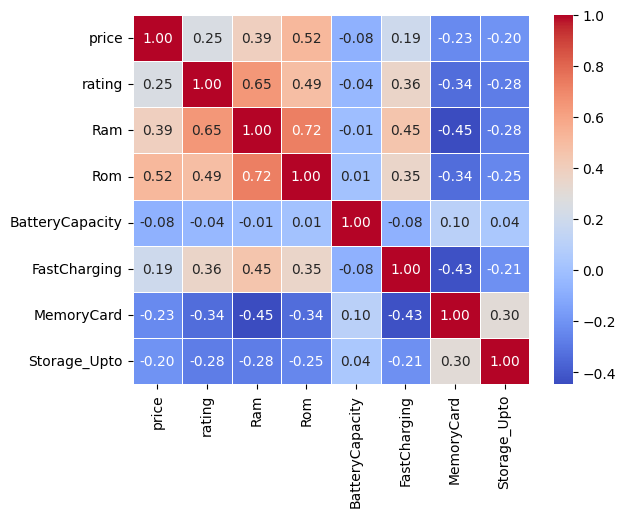

In [602]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)